Mounted at /content/drive


Epoch 1/4
1678/1678 [==============================] - 822s 487ms/step - loss: 0.1803 - accuracy: 0.9570 - val_loss: 0.1744 - val_accuracy: 0.9580
Epoch 2/4
1678/1678 [==============================] - 795s 473ms/step - loss: 0.1724 - accuracy: 0.9572 - val_loss: 0.1793 - val_accuracy: 0.9580
Epoch 3/4
1678/1678 [==============================] - 777s 463ms/step - loss: 0.1624 - accuracy: 0.9571 - val_loss: 0.1883 - val_accuracy: 0.9580
Epoch 4/4
1678/1678 [==============================] - 758s 452ms/step - loss: 0.1523 - accuracy: 0.9572 - val_loss: 0.2023 - val_accuracy: 0.9579


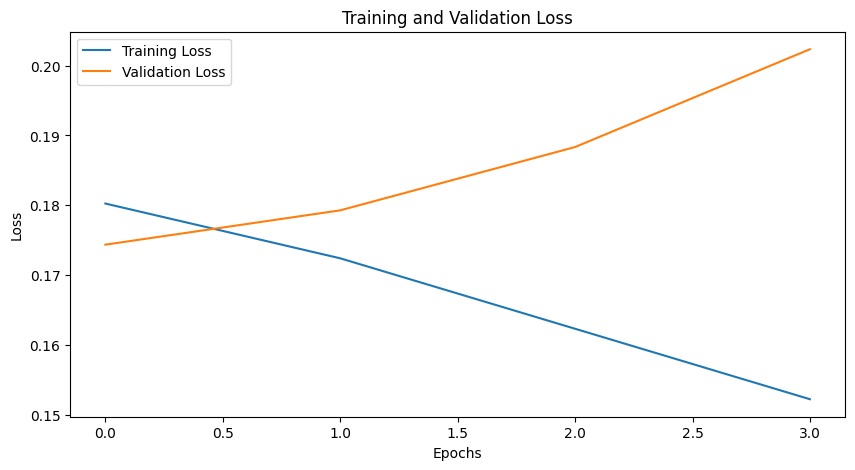

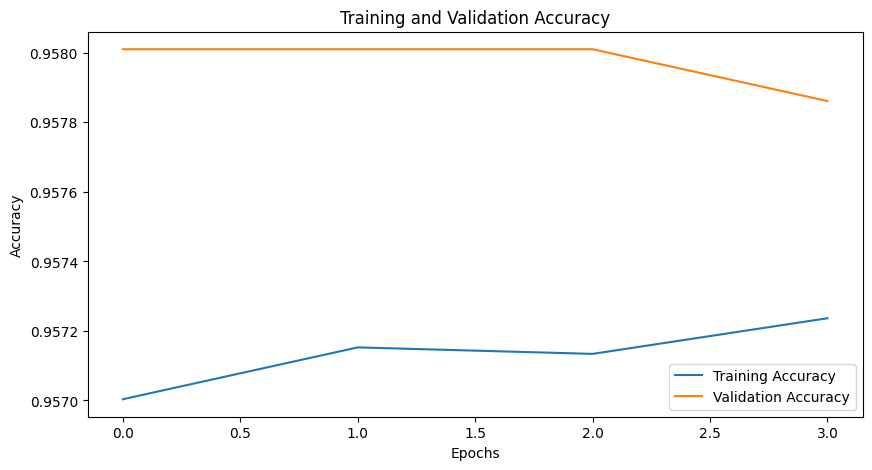

839/839 [==============================] - 27s 32ms/step - loss: 0.2023 - accuracy: 0.9579
Validation Accuracy: 0.9578614234924316
839/839 [==============================] - 26s 31ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     25713
           1       0.25      0.00      0.00      1127

    accuracy                           0.96     26840
   macro avg       0.60      0.50      0.49     26840
weighted avg       0.93      0.96      0.94     26840



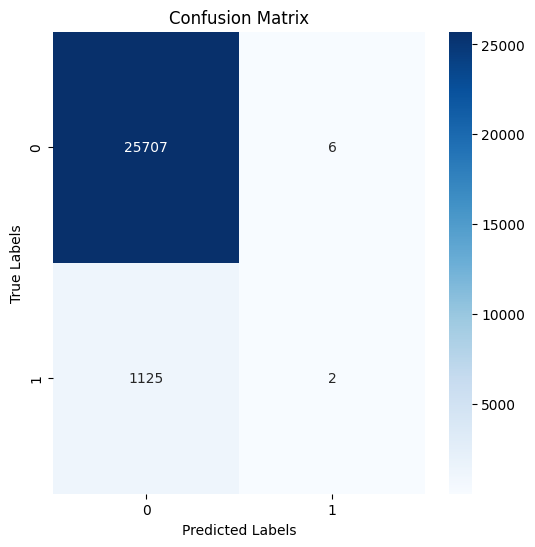

Tweet: In Michigan, republicans Convassers refused to cer... Label: 0
Tweet: Michigan just refused to certify the election by h... Label: 0
Tweet: "Wow! Michigan just refused to certify the electio... Label: 0
Tweet: #oops @freezingcoldtakes RT @realDonaldTrump: Wow!... Label: 0
Tweet: @Jim_Jordan BREAKING: A Republican election offici... Label: 0
Tweet: @BurgerLab12 @ChrisJohnsonMD @moy_barry @wjack7699... Label: 0
Tweet: Michigan just refused to certify the election by 1... Label: 0
Tweet: @fbyaruhanga_ Good Morning Brother. For us we are ... Label: 0
Tweet: Michigan just refused to certify the election was ... Label: 0
Tweet: @LLinWood @SidneyPowell1 no one Lin. they'll B eli... Label: 0


In [ ]:
# Libraries to mount Google Drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Define the path to your dataset
BASE_PATH = "/content/drive/My Drive/Forensics/"
path_dataset = BASE_PATH + "Truth_Seeker_Model_Dataset.csv"

# Step 1: Load the dataset
df = pd.read_csv(path_dataset)

# Step 2: Preprocessing
# Encoding the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['3_label_majority_answer'].astype(str))

# Preprocessing the text data
tokenizer = Tokenizer(num_words=5000, oov_token="OOV")
tokenizer.fit_on_texts(df['tweet'].astype(str))
sequences = tokenizer.texts_to_sequences(df['tweet'].astype(str))
X = pad_sequences(sequences, maxlen=100)  # Adjust the max length according to your data

# Step 3: Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Step 4: Building the model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(len(np.unique(labels)), activation='softmax')
])

# Step 5: Compiling and training the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4, batch_size=64)

# Plotting training and validation loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluating the model
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {val_accuracy}")

# Making Predictions
predictions = model.predict(X_test)
predicted_labels = [np.argmax(pred) for pred in predictions]

# Classification metrics
print("\nClassification Report:\n", classification_report(y_test, predicted_labels))

# Confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

results = list(zip(df['tweet'][len(X_train):], predicted_labels))
for tweet, label in results[:10]:
    print(f"Tweet: {tweet[:50]}... Label: {label}")
